In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

2025-01-22 23:54:39.250559: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 23:54:39.263501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737570279.279692   27412 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737570279.284678   27412 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 23:54:39.301861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

data curation


In [4]:
kaggle_credentials = json.load(open("kaggle.json"))

In [5]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials["username"]
os.environ['KAGGLE_KEY']=kaggle_credentials["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

 class_indices.json
 cuda-keyring_1.1-1_all.deb
 cuda-repo-ubuntu2404-12-6-local_12.6.3-560.35.05-1_amd64.deb
 kaggle.json
 leafdiseaseprediction.ipynb
 myenv
 newenv
'plantvillage dataset'
 plantvillage-dataset.zip


In [8]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
base_dir="plantvillage dataset/color"

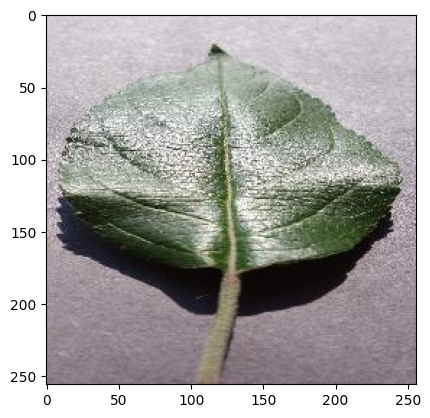

(256, 256, 3)


In [10]:
image_path = 'plantvillage dataset/color/Apple___healthy/0a02e8cb-b715-497f-a16a-c28b3409f927___RS_HL 7432.JPG'

img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()
print(img.shape)

In [11]:
img_size = 224
batch_size = 32

In [12]:

# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [13]:

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [14]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [15]:

# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/home/kaushal/Downloads/leafdisease/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1737570304.343302   27412 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4166 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [16]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=100,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)


Epoch 1/100


/home/kaushal/Downloads/leafdisease/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1737570305.989437   29288 service.cc:148] XLA service 0x762710009e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737570305.989474   29288 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-01-22 23:55:06.020947: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737570306.183857   29288 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-22 23:55:06

   3/1358 ━━━━━━━━━━━━━━━━━━━━ 1:11 53ms/step - accuracy: 0.0469 - loss: 8.5909     

I0000 00:00:1737570309.959183   29288 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 65ms/step - accuracy: 0.6028 - loss: 1.6305 - val_accuracy: 0.8596 - val_loss: 0.4431
Epoch 2/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.9201 - loss: 0.2530 - val_accuracy: 0.8768 - val_loss: 0.3895
Epoch 3/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9674 - loss: 0.0993 - val_accuracy: 0.8660 - val_loss: 0.5146
Epoch 4/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 85s 63ms/step - accuracy: 0.9744 - loss: 0.0755 - val_accuracy: 0.8820 - val_loss: 0.4758
Epoch 5/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 87s 64ms/step - accuracy: 0.9840 - loss: 0.0492 - val_accuracy: 0.8755 - val_loss: 0.5629
Epoch 6/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.8609 - val_loss: 0.7185
Epoch 7/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 85s 63ms/step - accuracy: 0.9880 - loss: 0.0377 - val_accuracy: 0.8532 - val_loss: 0.8039
Epoch 8/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 86s 64ms/step - accuracy: 0.9857 - los

In [19]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8423 - loss: 7.9678
Validation Accuracy: 84.79%


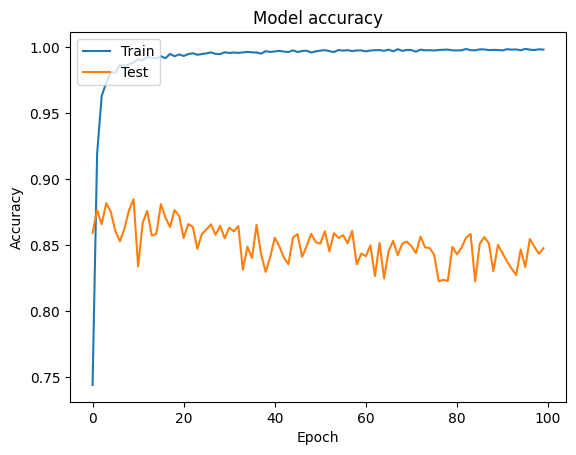

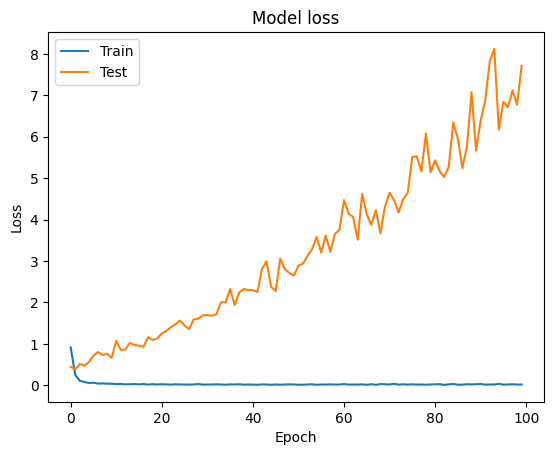

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [21]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [22]:

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [23]:

class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [27]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [28]:
model.save('leafs.h5')

In [29]:

# Example Usage
image_path1 = 'content/test_apple_black_rot.JPG'
image_path2 = 'content/test_blueberry_healthy.jpg'
image_path3 = 'content/Plants-tobacco-potential-modification-pharming-production-compounds.png'

predicted_class_name1 = predict_image_class(model, image_path1, class_indices)
predicted_class_name2 = predict_image_class(model, image_path2, class_indices)
predicted_class_name3 = predict_image_class(model, image_path3, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name1)
print("Predicted Class Name:", predicted_class_name2)
print("Predicted Class Name:", predicted_class_name3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class Name: Blueberry___healthy
